In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\erosb\09-2023 Boat Sales Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_wrangled.csv'))

In [4]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Short Description', 'Year Built',
       'Length', 'Width', 'Material', 'Location', 'Country',
       'Number of views last 7 days', 'Price_type', 'Price_num',
       'Price_adjusted', 'Age_Classification', 'Size_Classification'],
      dtype='object')

There are no columns that need to be excluded for exploratory visual analysis.

#### #3 Create a correlation matrix heatmap

C:\Users\erosb\AppData\Local\Temp\ipykernel_18300\2704371393.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot = True, ax=ax) #annot allows the heatmap to place the corr. coefficients onto the heatmap


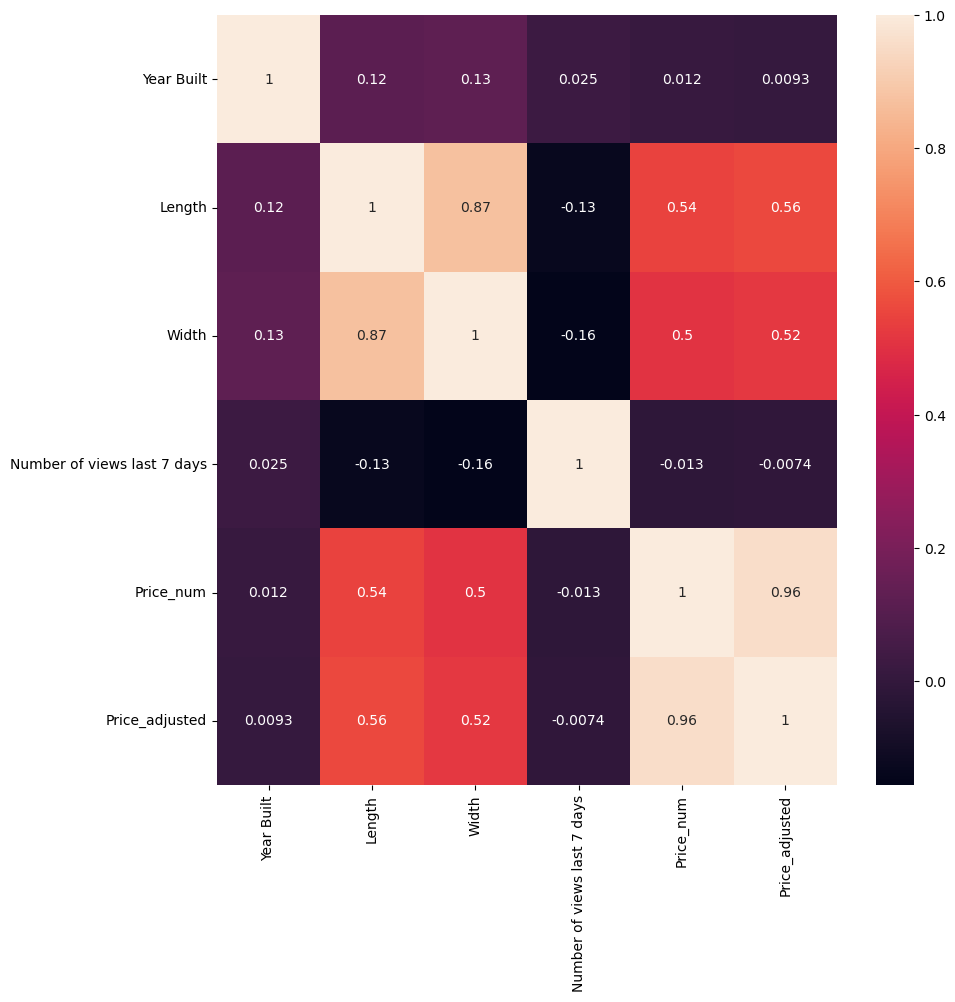

In [5]:
f,ax = plt.subplots(figsize=(10,10)) #create subplot

#create correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplot defined above
corr = sns.heatmap(df.corr(), annot = True, ax=ax) #annot allows the heatmap to place the corr. coefficients onto the heatmap

Length and width are strongly positively correlated (0.87). This does not tell us much for meaningful analysis because it makes sense that the greater the length of the boat, the greater the width.

Length and width are moderately positively correlated with Price_adjusted. This also makes since that the bigger the boat, in general, the higher the price.

Price_num and Price_adjusted are obviously strongly correlated because the adjusted price is calculated by the price number.

The number of views variable would have been of interest against the other variables - so it can be concluded that there is no strong correlation between that and length, width, year built, or price. Year built may have a different shape of correlation though since older and newer boats may be more popular.

#### #4 Create a scatterplot for Year Built and Number of views in the last 7 days

In [6]:
#exclude unknown year builts
df_yr_known = df[df['Year Built'] != 0]

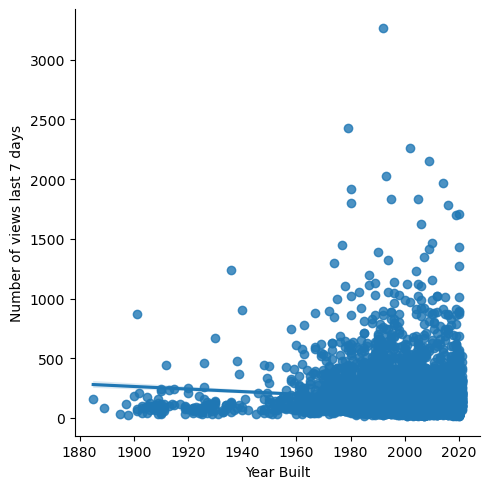

In [7]:
sns.lmplot(x='Year Built', y='Number of views last 7 days', data=df_yr_known)

First, there are a great deal more boats in the data that are built after 1960. The boats that are getting the most views though (over 1000) are newer than 1980.

#### #5 Pair Plot

In [11]:
subset = df[['Length', 'Number of views last 7 days', 'Price_adjusted']]

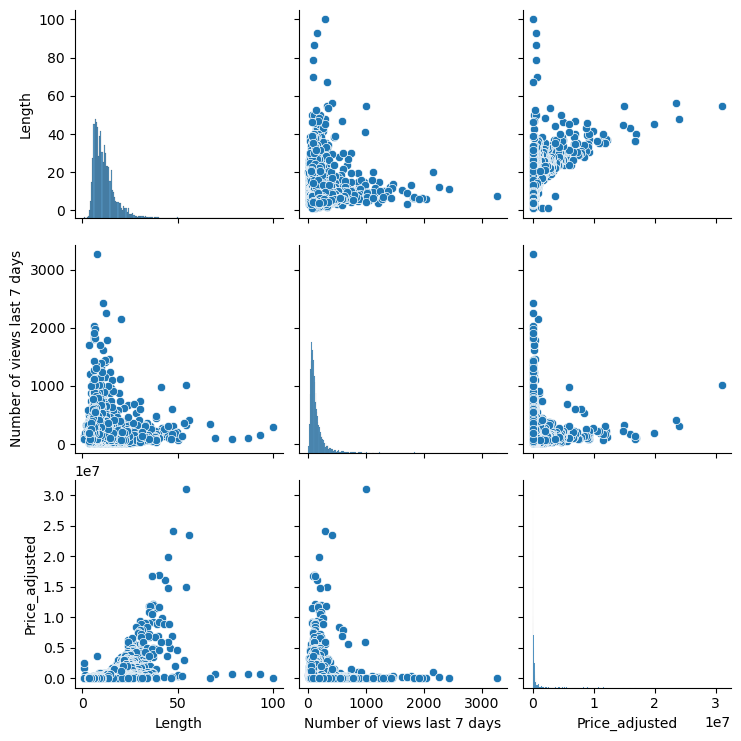

In [12]:
sns.pairplot(subset)

In [13]:
#with year built
subset2 = df_yr_known[['Year Built', 'Length', 'Number of views last 7 days', 'Price_adjusted']]

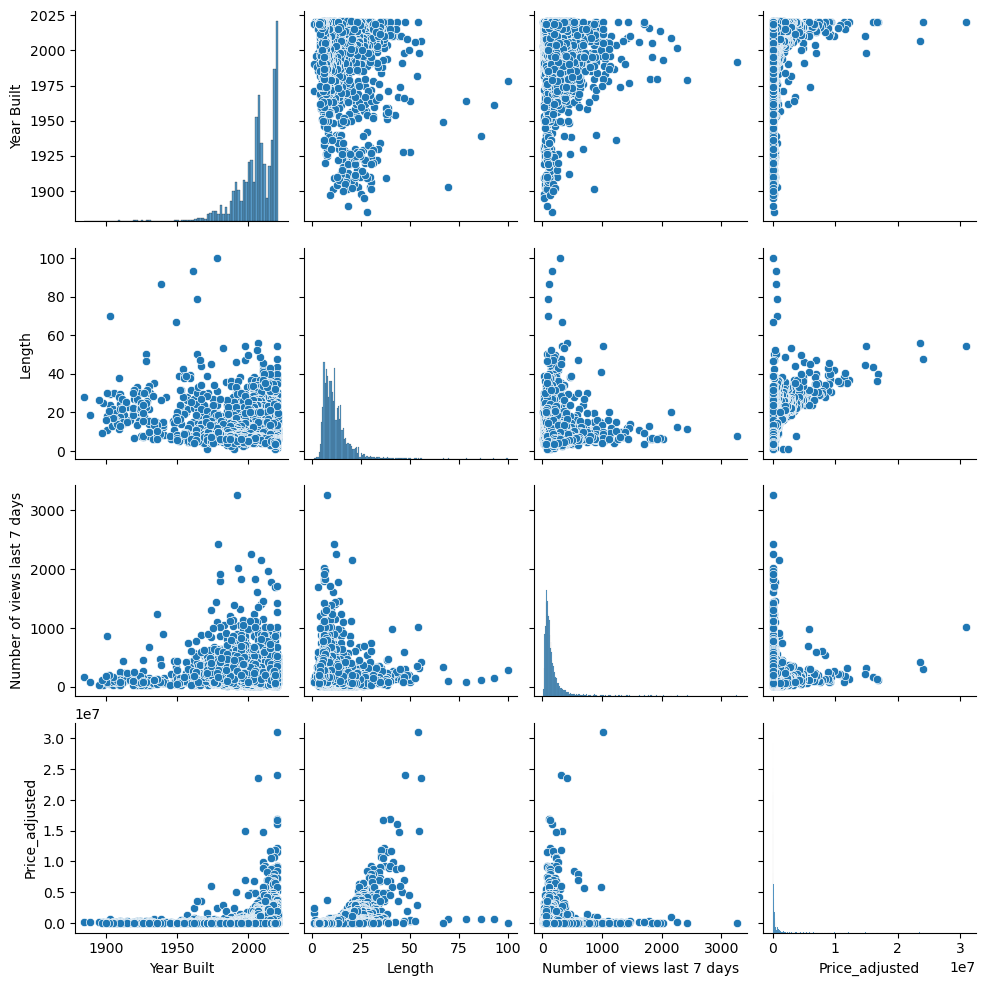

In [14]:
sns.pairplot(subset2)

Again, the variable of most interest is the number of views the listing has gotten in the last week. We already saw the effect of year built in the above scatterplot. Now we can also see how length is affecting views. The listings with over 1000 views are under 25 meters. This is also where the majority of listings fall. Lastly, the adjusted price for listings with over 1000 views are mostly under 400,000.

#### #6 Categorical Plot

<Axes: xlabel='Price_adjusted', ylabel='Count'>

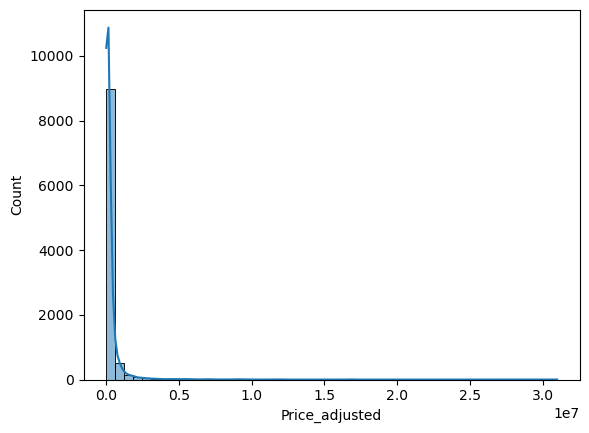

In [24]:
#visualize price distribution with histogram
sns.histplot(df['Price_adjusted'], bins=50, kde=True)

A great majority of listings are under 200,000. Since the categories are so skewed, it is not worth it to make price categories.

#### #7 Questions

Q: What are the characteristics of the most viewed boat listings in the last 7 days? 

A: Built after 1980, under 25 meters in length, and under 400,000 euros.

Q: How can listings be fairly compared for price?

A: convert all to most commmon currency type - euros.

Q: What are the most popular locations?
still unknown

Q: What is the most popular size of boat? 

A: There are the most listings of class 2 boats. Class 2 boats also have the most number of views.

New questions: Does the description text in the boat's listing have an effect on the number of views? Does the material? Manufacturer? Do these factors vary by country?

In [26]:
df.head()

,Price,Boat Type,Manufacturer,Short Description,Year Built,Length,Width,Material,Location,Country,Number of views last 7 days,Price_type,Price_num,Price_adjusted,Age_Classification,Size_Classification
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,Switzerland,226,CHF,3337,3493.54,Contemporary,Class A
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,Germany,75,EUR,3490,3490.00,Contemporary,Class A
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,Switzerland,124,CHF,3770,3946.85,Unknown,Class A
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,Denmark,64,DKK,25900,3474.90,Contemporary,Class A
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,Germany,58,EUR,3399,3399.00,Contemporary,Class A


#### #8 Hypotheses

Number of views is affected by all the variables to different degrees.